In [1]:
import numpy as np
from sklearn import datasets

C:\Users\rannr\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 5.99 ms


0.8129802602658359

### 使用梯度下降法

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

C:\Users\rannr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
G:\Jupyter\Machine-Learning-Tutorial\06-Gradient-Descent\05-Vectorize-Gradient-Descent\playML\LinearRegression.py:27: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta))**2) / len(X_b) #X_b是矩阵，theta是向量。矩阵点乘向量结果是列向量。知识点1
G:\Jupyter\Machine-Learning-Tutorial\06-Gradient-Descent\05-Vectorize-Gradient-Descent\playML\LinearRegression.py:46: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon ):


LinearRegression()

### 因为对于一个x的很多特征，每一个特征对应的数据规模是不一样的（比如房间数最多可能就10个，房龄就可能不止10年）


In [6]:
# 取更小的eta值
lin_reg2.fit_gd(X_train, y_train, eta = 0.000001)

LinearRegression()

In [7]:
lin_reg2.score(X_test, y_test)

nan

In [8]:
lin_reg2.fit_gd(X_train, y_train, eta = 0.000001, n_iters = 1e6)

LinearRegression()

In [9]:
lin_reg2.score(X_test, y_test)

nan

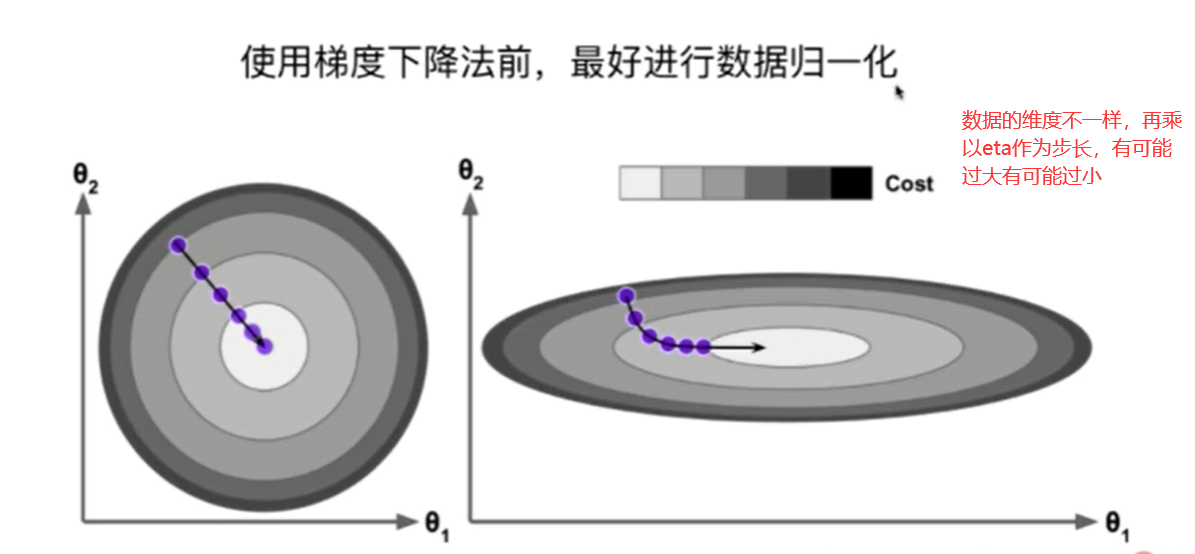

### 使用梯度下降法前进行数据归一化

In [10]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)

lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 259 ms


LinearRegression()

In [11]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)

0.8129880620122235

### 梯度下降法的优势

In [16]:
m = 1000 #1000个样本
n = 5000 #1个样本有5000特征值

big_X = np.random.normal(size=(m,n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1) # 生成均匀分布在[0,100)的theta
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m) #生成y = ax+b+均值为0方差为10的干扰数

In [19]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 5.81 s


LinearRegression()

In [20]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 3.63 s


LinearRegression()

### 由此可见，使用运用梯度下降法的线性回归比多元线性回归的时间复杂度低